In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/csv files/data-storm-6.0 - Storming round/train_storming_round.csv')
test_df = pd.read_csv('/content/drive/MyDrive/csv files/data-storm-6.0 - Storming round/test_storming_round.csv')

In [ ]:
# show all columns
pd.set_option('display.max_columns', None)

In [ ]:
train_df.head(6)

,row_id,agent_code,agent_age,agent_join_month,first_policy_sold_month,year_month,unique_proposals_last_7_days,unique_proposals_last_15_days,unique_proposals_last_21_days,unique_proposal,unique_quotations_last_7_days,unique_quotations_last_15_days,unique_quotations_last_21_days,unique_quotations,unique_customers_last_7_days,unique_customers_last_15_days,unique_customers_last_21_days,unique_customers,new_policy_count,ANBP_value,net_income,number_of_policy_holders,number_of_cash_payment_policies
0,1,455ca878,45,2/1/2021,9/1/2023,1/1/2023,3,6,2,12,3,0,4,9,3,4,8,15,0,0,93313,30,162
1,2,c823ce77,48,4/1/2022,2/1/2024,1/1/2023,1,4,12,21,3,1,8,14,4,3,10,17,25,1071450,164804,0,175
2,3,62154055,53,5/1/2020,9/1/2023,1/1/2023,3,5,5,17,1,6,5,14,3,7,11,21,26,1601210,426690,84,78
3,4,c58bfa6e,44,7/1/2019,3/1/2022,1/1/2023,1,0,12,17,1,1,5,11,2,2,9,13,18,283230,47793,39,144
4,5,b1e5f770,20,9/1/2020,2/1/2023,1/1/2023,0,6,10,17,3,6,2,13,3,10,6,19,20,1957680,562239,19,40
5,6,b9c2f37a,32,10/1/2019,8/1/2022,1/1/2023,2,2,16,24,2,0,5,13,4,0,9,13,28,2238964,586313,52,168


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15308 entries, 0 to 15307
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   row_id                           15308 non-null  int64 
 1   agent_code                       15308 non-null  object
 2   agent_age                        15308 non-null  int64 
 3   agent_join_month                 15308 non-null  object
 4   first_policy_sold_month          15308 non-null  object
 5   year_month                       15308 non-null  object
 6   unique_proposals_last_7_days     15308 non-null  int64 
 7   unique_proposals_last_15_days    15308 non-null  int64 
 8   unique_proposals_last_21_days    15308 non-null  int64 
 9   unique_proposal                  15308 non-null  int64 
 10  unique_quotations_last_7_days    15308 non-null  int64 
 11  unique_quotations_last_15_days   15308 non-null  int64 
 12  unique_quotations_last_21_days  

## Summary statistics

In [ ]:
train_df.describe()

,row_id,agent_age,unique_proposals_last_7_days,unique_proposals_last_15_days,unique_proposals_last_21_days,unique_proposal,unique_quotations_last_7_days,unique_quotations_last_15_days,unique_quotations_last_21_days,unique_quotations,unique_customers_last_7_days,unique_customers_last_15_days,unique_customers_last_21_days,unique_customers,new_policy_count,ANBP_value,net_income,number_of_policy_holders,number_of_cash_payment_policies
count,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,1.530800e+04,1.530800e+04,15308.000000,15308.000000
mean,7654.500000,40.585772,1.491246,2.991116,10.045728,17.516527,1.989679,2.996538,4.469624,13.922394,2.995493,4.997714,7.500523,15.493729,20.269990,1.025338e+06,2.280414e+05,30.968317,101.180886
std,4419.183296,11.688204,1.119554,2.001613,6.037296,6.616954,1.420996,2.004386,2.875329,4.663777,1.644117,2.438918,3.468597,4.542321,9.541693,8.054989e+05,1.736671e+05,24.621933,75.323464
min,1.000000,20.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,1.160000e+03,0.000000,0.000000
25%,3827.750000,31.000000,0.000000,1.000000,5.000000,12.000000,1.000000,1.000000,2.000000,11.000000,2.000000,3.000000,5.000000,12.000000,15.000000,3.473238e+05,9.282500e+04,12.000000,38.000000
50%,7654.500000,41.000000,1.000000,3.000000,10.000000,17.000000,2.000000,3.000000,4.000000,14.000000,3.000000,5.000000,8.000000,15.000000,21.000000,9.031445e+05,1.899740e+05,28.000000,90.000000
75%,11481.250000,51.000000,2.000000,5.000000,15.000000,23.000000,3.000000,5.000000,7.000000,17.000000,4.000000,7.000000,10.000000,19.000000,27.000000,1.560700e+06,3.217448e+05,48.000000,152.000000
max,15308.000000,60.000000,3.000000,6.000000,20.000000,34.000000,4.000000,6.000000,9.000000,32.000000,6.000000,10.000000,15.000000,31.000000,42.000000,3.933840e+06,1.140237e+06,116.000000,378.000000


In [ ]:
print(train_df.columns.tolist())

['row_id', 'agent_code', 'agent_age', 'agent_join_month', 'first_policy_sold_month', 'year_month', 'unique_proposals_last_7_days', 'unique_proposals_last_15_days', 'unique_proposals_last_21_days', 'unique_proposal', 'unique_quotations_last_7_days', 'unique_quotations_last_15_days', 'unique_quotations_last_21_days', 'unique_quotations', 'unique_customers_last_7_days', 'unique_customers_last_15_days', 'unique_customers_last_21_days', 'unique_customers', 'new_policy_count', 'ANBP_value', 'net_income', 'number_of_policy_holders', 'number_of_cash_payment_policies', 'date_diff']


In [ ]:
test_df.head()

,row_id,agent_code,agent_age,agent_join_month,first_policy_sold_month,year_month,unique_proposals_last_7_days,unique_proposals_last_15_days,unique_proposals_last_21_days,unique_proposal,unique_quotations_last_7_days,unique_quotations_last_15_days,unique_quotations_last_21_days,unique_quotations,unique_customers_last_7_days,unique_customers_last_15_days,unique_customers_last_21_days,unique_customers,new_policy_count,ANBP_value,net_income,number_of_policy_holders,number_of_cash_payment_policies
0,1,de9a845f,43,6/1/2020,4/1/2022,9/1/2024,0,2,12,17,4,5,1,14,6,9,5,20,24,511320,86955,0,48
1,2,1450745b,32,5/1/2019,8/1/2022,9/1/2024,1,3,4,13,0,1,5,12,2,2,5,9,14,296660,55062,9,56
2,3,5c4dd08c,52,6/1/2019,6/1/2022,9/1/2024,2,6,17,27,3,4,4,21,5,6,10,21,34,833544,224429,0,34
3,4,3c7a8b50,21,5/1/2021,9/1/2023,9/1/2024,1,6,17,26,3,1,7,15,3,2,10,15,33,2972409,439159,15,33
4,5,3dd0c2a1,33,9/1/2022,11/1/2023,9/1/2024,0,4,2,8,3,4,6,14,5,4,6,15,15,168150,18195,60,90


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   row_id                           914 non-null    int64 
 1   agent_code                       914 non-null    object
 2   agent_age                        914 non-null    int64 
 3   agent_join_month                 914 non-null    object
 4   first_policy_sold_month          914 non-null    object
 5   year_month                       914 non-null    object
 6   unique_proposals_last_7_days     914 non-null    int64 
 7   unique_proposals_last_15_days    914 non-null    int64 
 8   unique_proposals_last_21_days    914 non-null    int64 
 9   unique_proposal                  914 non-null    int64 
 10  unique_quotations_last_7_days    914 non-null    int64 
 11  unique_quotations_last_15_days   914 non-null    int64 
 12  unique_quotations_last_21_days   914

In [ ]:
print("\nMissing Values:")
print(train_df.isnull().sum())


Missing Values:
row_id                             0
agent_code                         0
agent_age                          0
agent_join_month                   0
first_policy_sold_month            0
year_month                         0
unique_proposals_last_7_days       0
unique_proposals_last_15_days      0
unique_proposals_last_21_days      0
unique_proposal                    0
unique_quotations_last_7_days      0
unique_quotations_last_15_days     0
unique_quotations_last_21_days     0
unique_quotations                  0
unique_customers_last_7_days       0
unique_customers_last_15_days      0
unique_customers_last_21_days      0
unique_customers                   0
new_policy_count                   0
ANBP_value                         0
net_income                         0
number_of_policy_holders           0
number_of_cash_payment_policies    0
date_diff                          0
dtype: int64


In [ ]:
train_df['year_month'] = pd.to_datetime(train_df['year_month'], format='%m/%d/%Y')
test_df['year_month'] = pd.to_datetime(test_df['year_month'], format='%m/%d/%Y')

In [ ]:
train_df['year_month'].unique()

<DatetimeArray>
['2023-01-01 00:00:00', '2023-02-01 00:00:00', '2023-03-01 00:00:00',
 '2023-04-01 00:00:00', '2023-05-01 00:00:00', '2023-06-01 00:00:00',
 '2023-07-01 00:00:00', '2023-08-01 00:00:00', '2023-09-01 00:00:00',
 '2023-10-01 00:00:00', '2023-11-01 00:00:00', '2023-12-01 00:00:00',
 '2024-01-01 00:00:00', '2024-02-01 00:00:00', '2024-03-01 00:00:00',
 '2024-04-01 00:00:00', '2024-05-01 00:00:00', '2024-06-01 00:00:00',
 '2024-07-01 00:00:00', '2024-08-01 00:00:00']
Length: 20, dtype: datetime64[ns]

In [ ]:
train_df['agent_join_month'] = pd.to_datetime(train_df['agent_join_month'], format='%m/%d/%Y', errors='coerce')
train_df['first_policy_sold_month'] = pd.to_datetime(train_df['first_policy_sold_month'], format='%m/%d/%Y', errors='coerce')

test_df['agent_join_month'] = pd.to_datetime(test_df['agent_join_month'], format='%m/%d/%Y', errors='coerce')
test_df['first_policy_sold_month'] = pd.to_datetime(test_df['first_policy_sold_month'], format='%m/%d/%Y', errors='coerce')

In [ ]:
train_df['agent_tenure_months'] = ((train_df['year_month'].dt.year - train_df['agent_join_month'].dt.year) * 12 +
                          (train_df['year_month'].dt.month - train_df['agent_join_month'].dt.month))

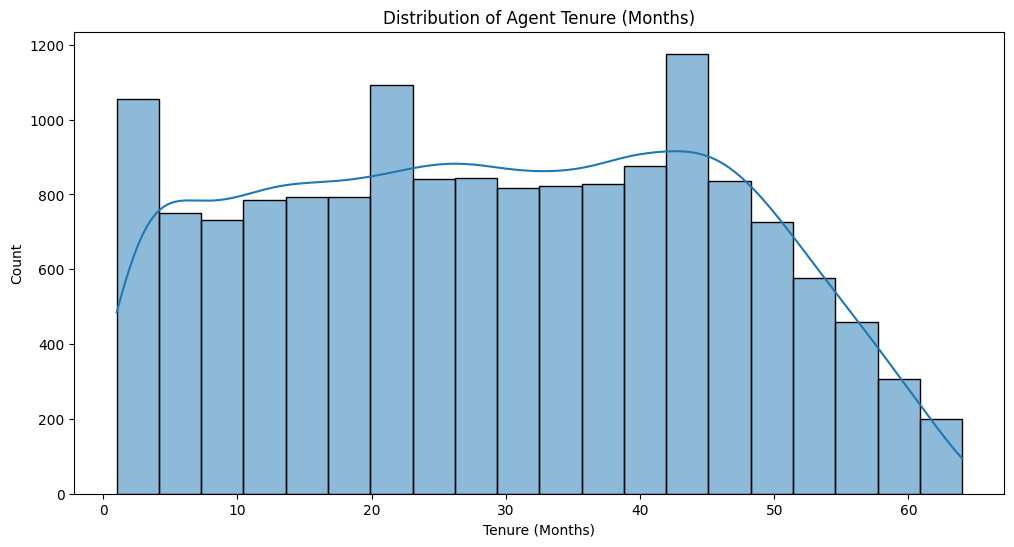

In [ ]:
# Distribution of tenure months
plt.figure(figsize=(12, 6))
sns.histplot(train_df['agent_tenure_months'], bins=20, kde=True)
plt.title('Distribution of Agent Tenure (Months)')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.show()

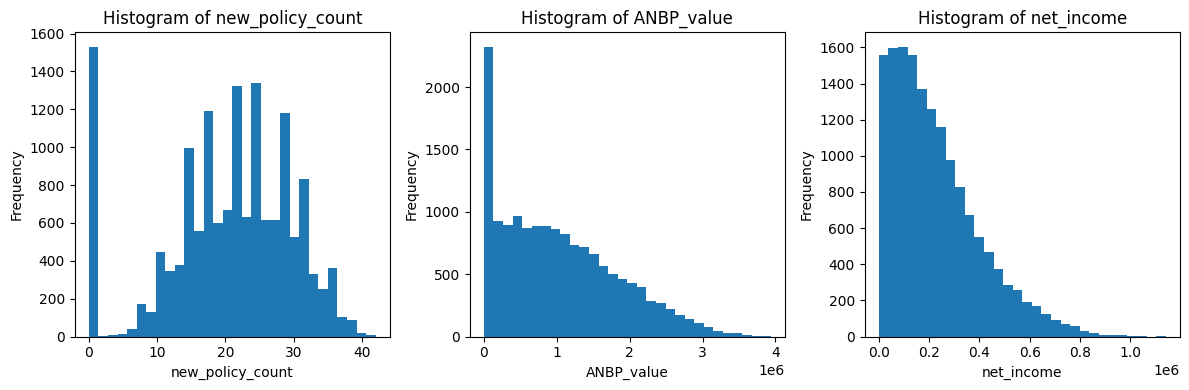

In [ ]:
import matplotlib.pyplot as plt
# Assuming 'train_df' is your DataFrame
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(train_df['new_policy_count'], bins=30)
plt.title('Histogram of new_policy_count')
plt.xlabel('new_policy_count')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(train_df['ANBP_value'], bins=30)
plt.title('Histogram of ANBP_value')
plt.xlabel('ANBP_value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(train_df['net_income'], bins=30)
plt.title('Histogram of net_income')
plt.xlabel('net_income')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()


In [ ]:
sales_by_month = train_df.groupby('year_month').agg({'new_policy_count': 'sum', 'ANBP_value': 'sum'})
sales_by_month


,new_policy_count,ANBP_value
year_month,,
2023-01-01,12887,661715315
2023-02-01,13617,667126713
2023-03-01,13591,680989857
2023-04-01,13629,690631468
2023-05-01,14248,728238374
2023-06-01,14065,705247082
2023-07-01,14327,702103080
2023-08-01,14956,748374125
2023-09-01,14896,751581124


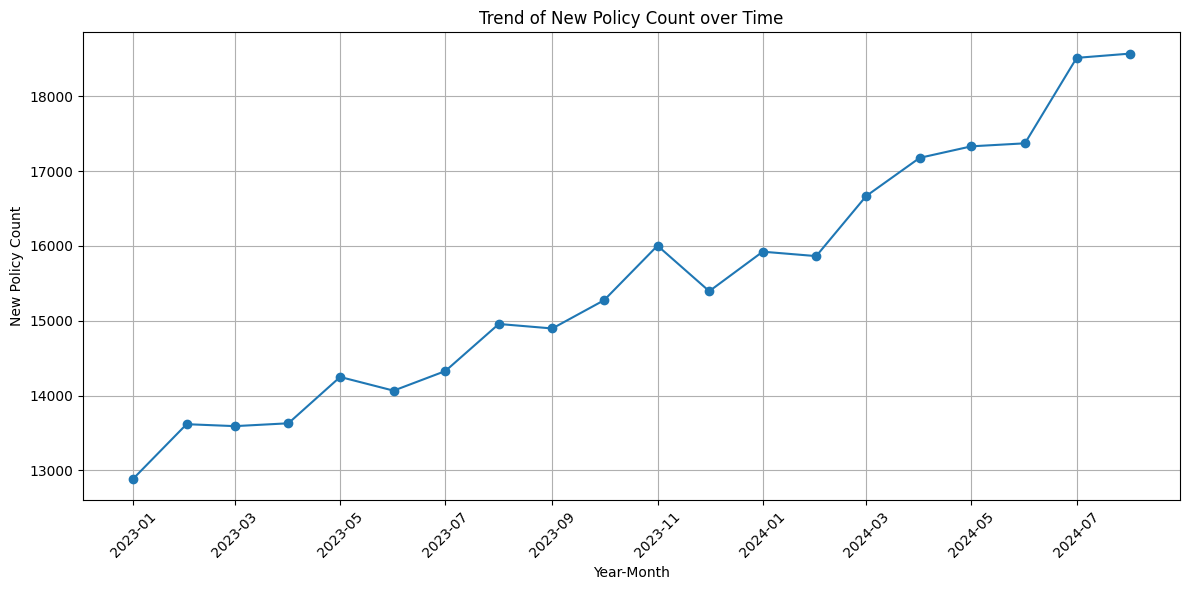

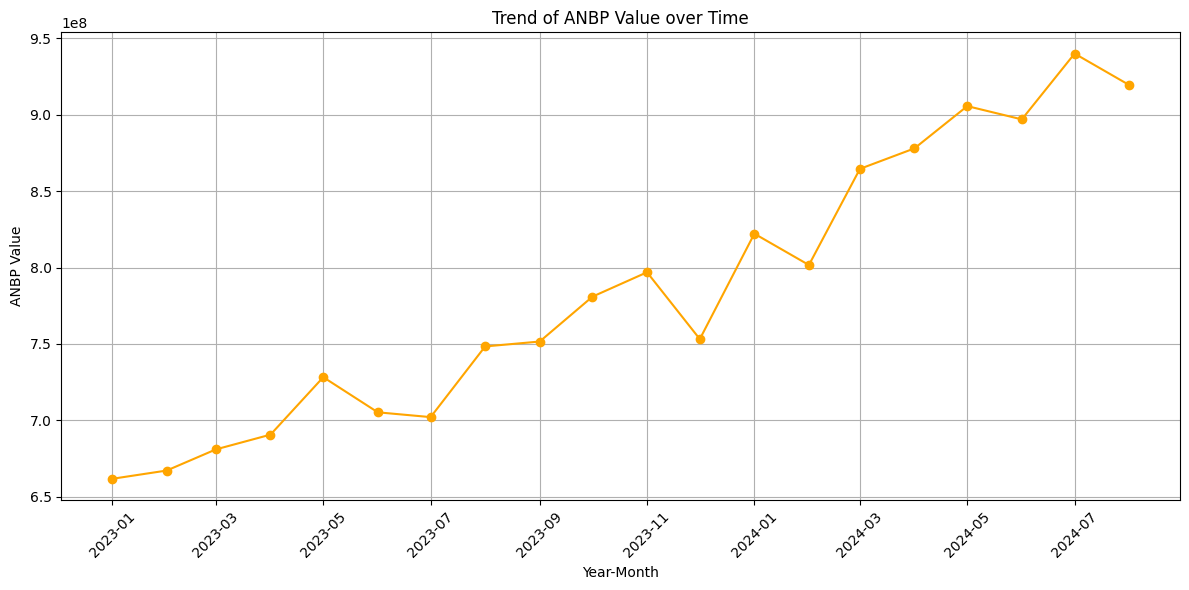

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'sales_by_month' DataFrame is already created as in your previous code

# Plot trends for 'new_policy_count'
plt.figure(figsize=(12, 6))
plt.plot(sales_by_month.index, sales_by_month['new_policy_count'], marker='o')
plt.title('Trend of New Policy Count over Time')
plt.xlabel('Year-Month')
plt.ylabel('New Policy Count')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


# Plot trends for 'ANBP_value'
plt.figure(figsize=(12, 6))
plt.plot(sales_by_month.index, sales_by_month['ANBP_value'], marker='o', color='orange')
plt.title('Trend of ANBP Value over Time')
plt.xlabel('Year-Month')
plt.ylabel('ANBP Value')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Multivariate analysis

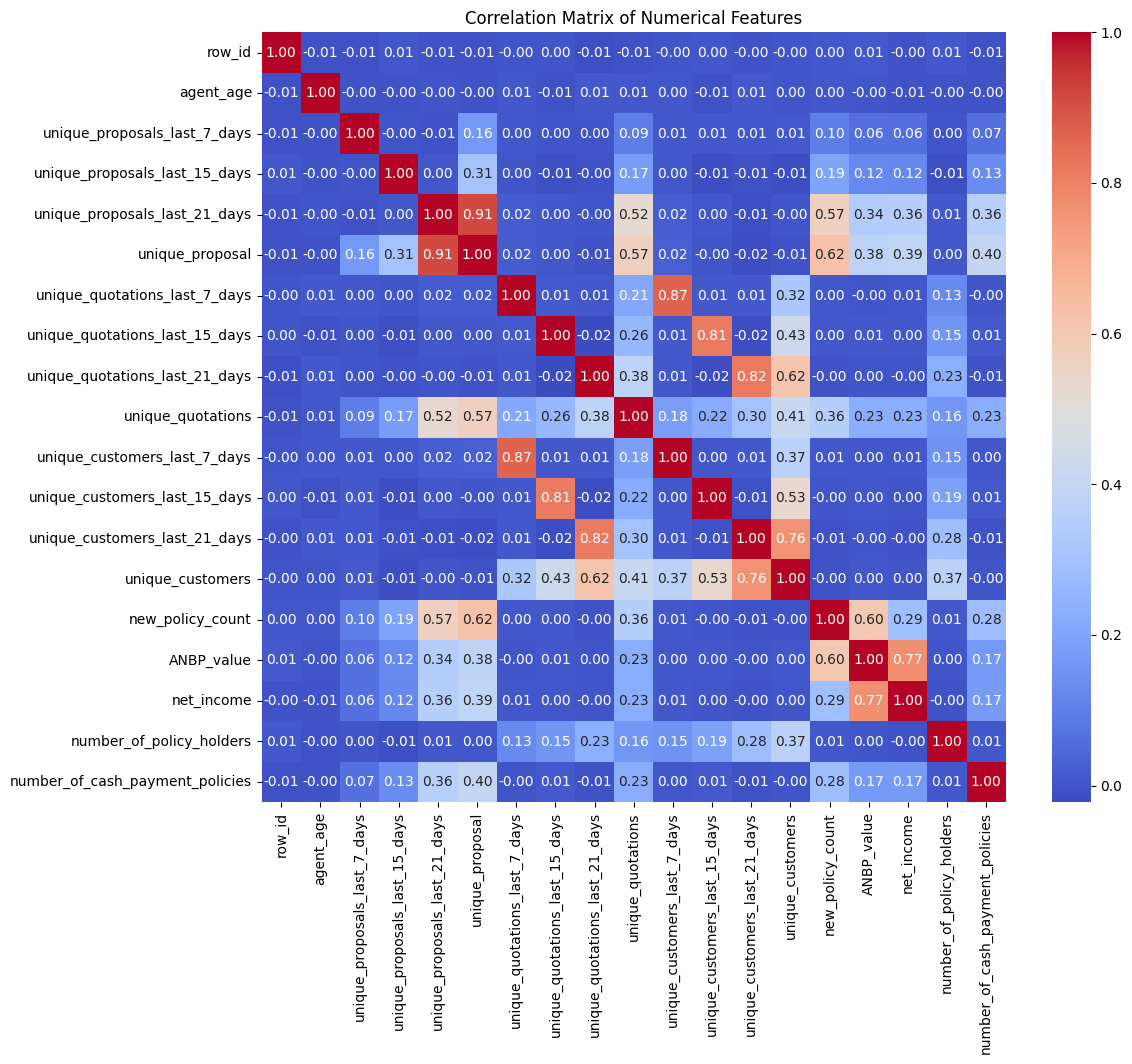

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Correlation matrix of numerical features
numerical_features = train_df.select_dtypes(include=np.number)
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


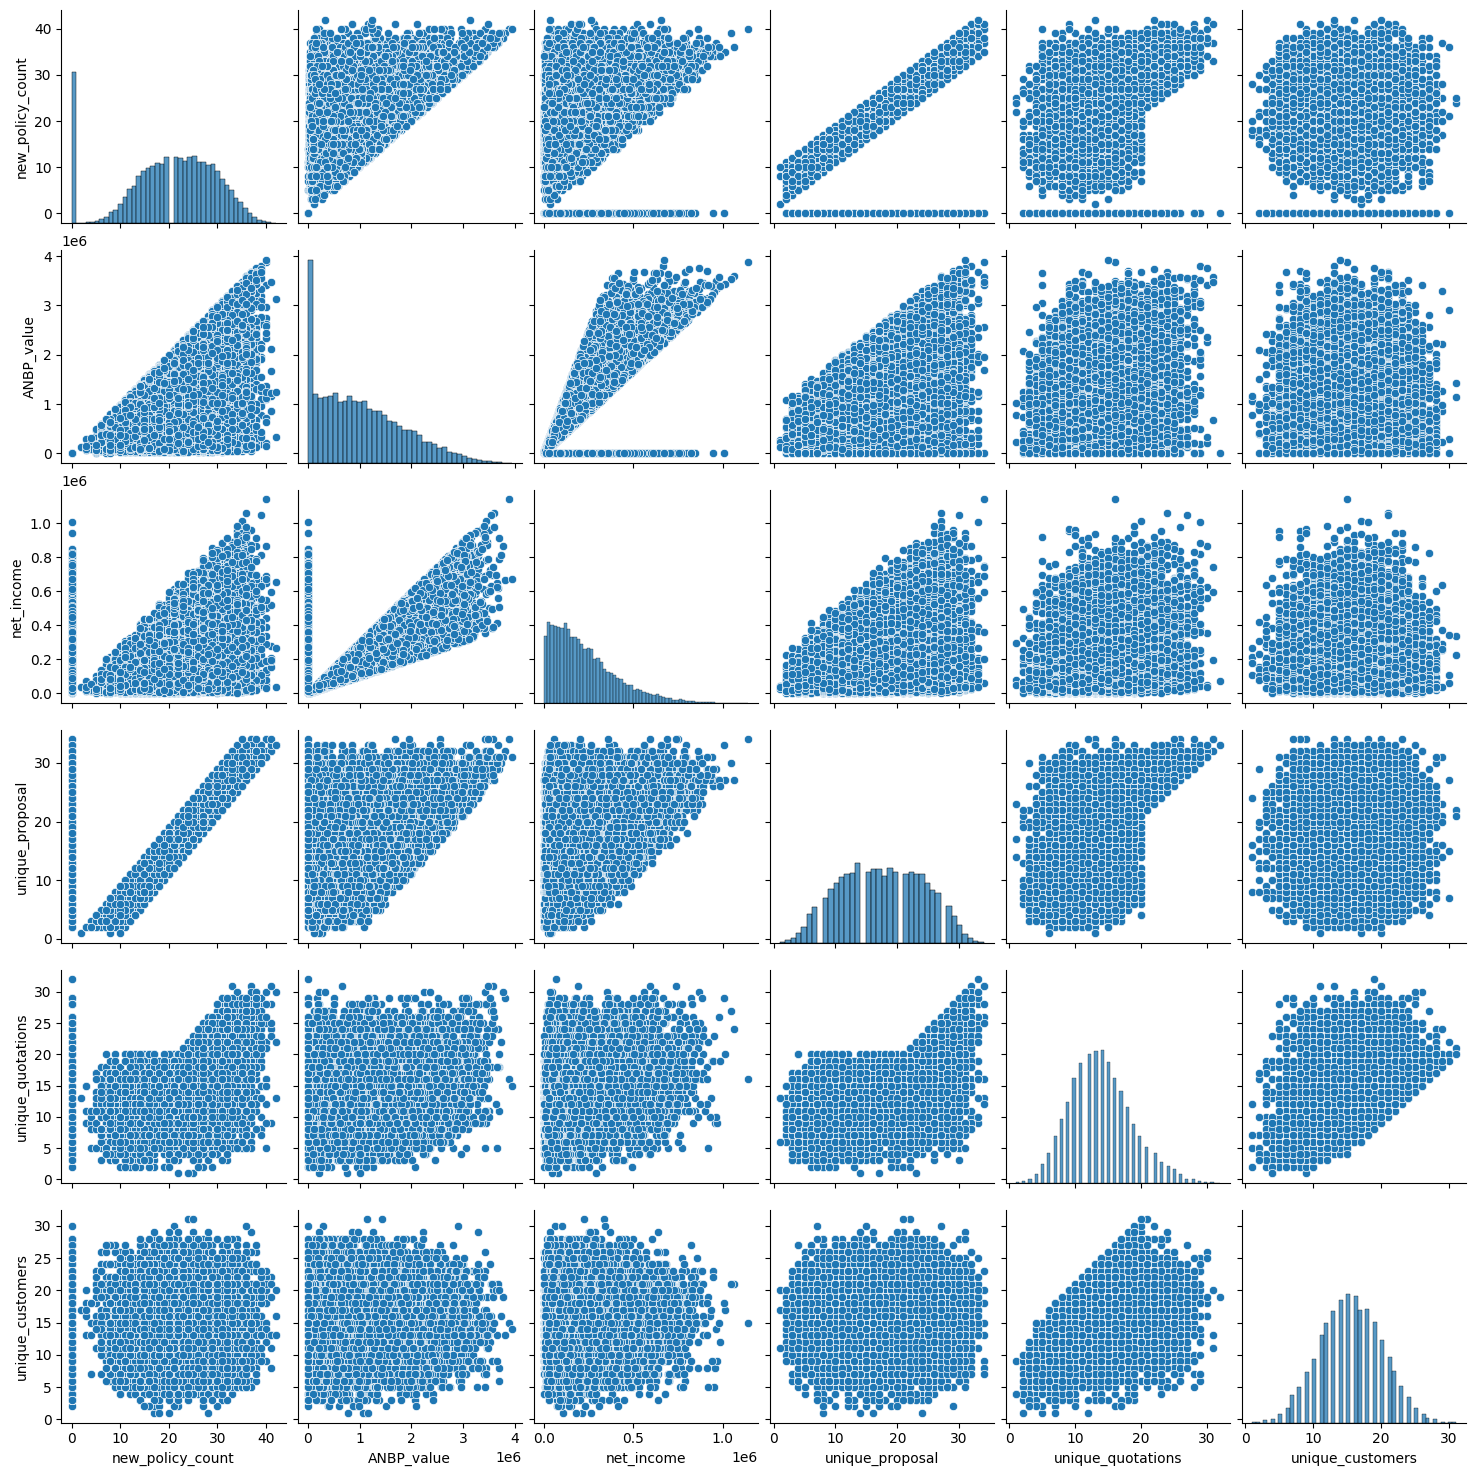

In [ ]:
import matplotlib.pyplot as plt
# Create the pair plot
sns.pairplot(train_df[['new_policy_count', 'ANBP_value', 'net_income', 'unique_proposal', 'unique_quotations', 'unique_customers']])
plt.show()


## An example of several agents' trajectories evolve over time

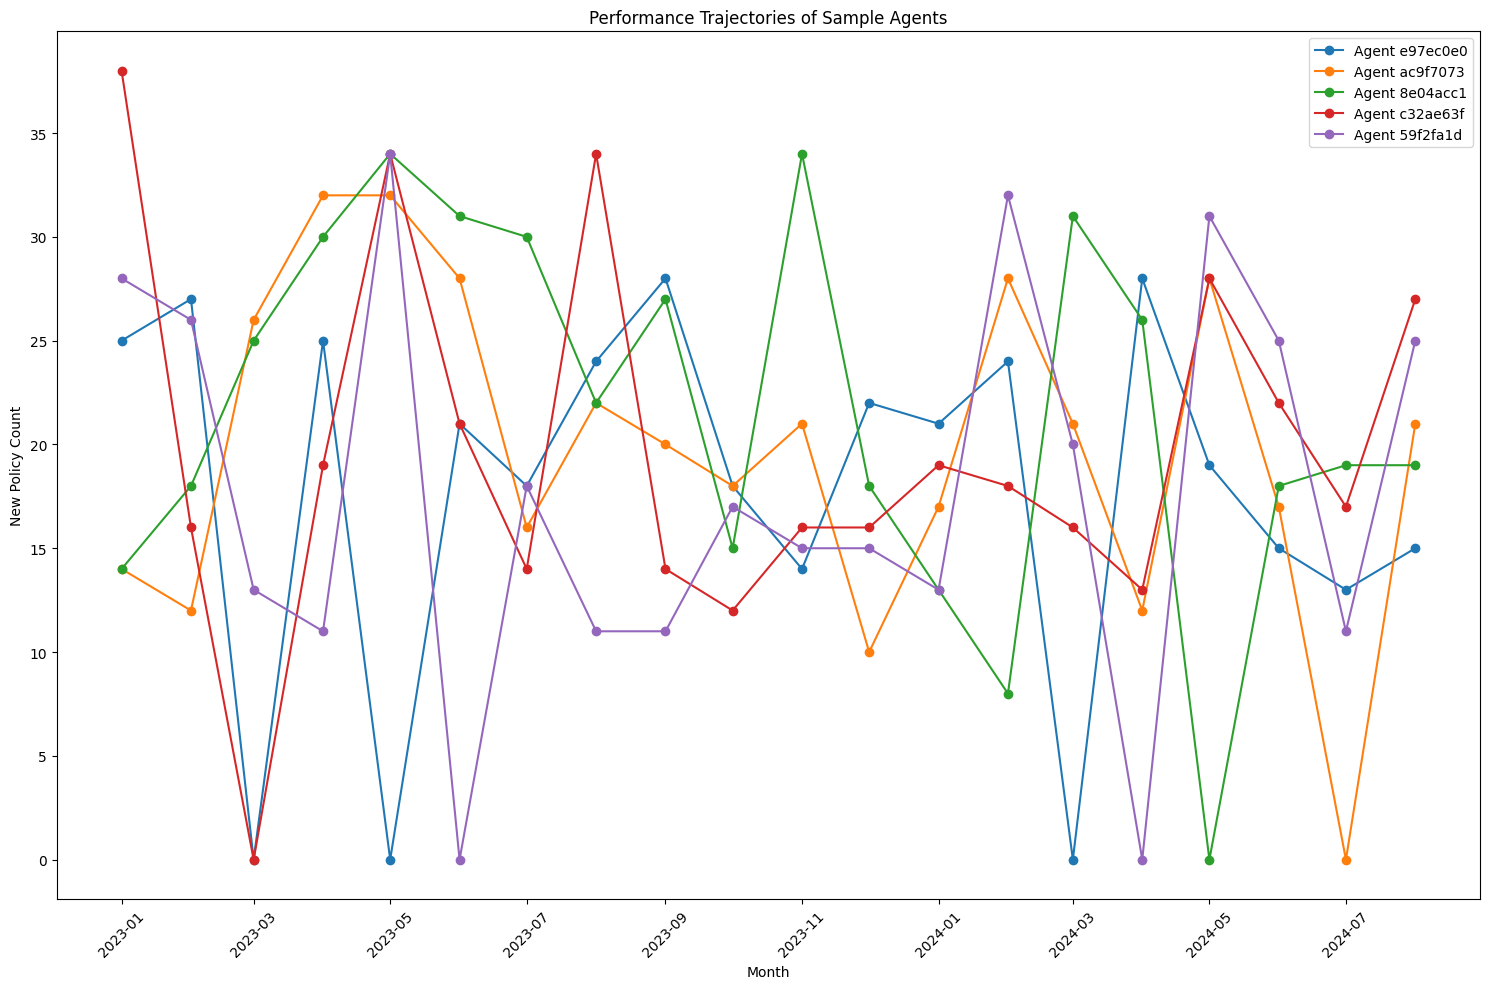

In [ ]:
# Sample a few agents to analyze their performance over time
sample_agents = train_df['agent_code'].value_counts().head(5).index.tolist()

plt.figure(figsize=(15, 10))
for agent in sample_agents:
    agent_data = train_df[train_df['agent_code'] == agent].sort_values('year_month')
    plt.plot(agent_data['year_month'], agent_data['new_policy_count'], marker='o', label=f'Agent {agent}')

plt.title('Performance Trajectories of Sample Agents')
plt.xlabel('Month')
plt.ylabel('New Policy Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Pivot the table to get monthly new policy counts for each agent
agent_monthly_sales = train_df.pivot_table(index='agent_code', columns='year_month', values='new_policy_count', aggfunc='sum', fill_value=0)

# Display the resulting DataFrame
agent_monthly_sales


year_month,2023-01-01,2023-02-01,2023-03-01,2023-04-01,2023-05-01,2023-06-01,2023-07-01,2023-08-01,2023-09-01,2023-10-01,2023-11-01,2023-12-01,2024-01-01,2024-02-01,2024-03-01,2024-04-01,2024-05-01,2024-06-01,2024-07-01,2024-08-01
agent_code,,,,,,,,,,,,,,,,,,,,
003c1999,0,31,27,22,20,0,14,26,35,35,21,30,18,33,15,19,32,23,28,19
00d5bda3,19,18,0,0,29,31,33,33,28,32,0,37,35,30,19,22,0,18,21,0
012a3553,9,20,0,26,9,0,22,29,25,34,23,21,14,17,30,0,13,12,30,28
012f0e15,25,27,25,12,27,24,0,0,17,19,20,26,21,0,14,22,30,26,21,37
0177ed5f,13,29,21,28,25,19,34,15,20,18,15,18,20,21,26,29,23,0,24,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff8edcc9,29,0,22,0,27,17,37,25,23,21,26,31,36,33,20,26,11,12,16,16
ff955d18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0
ffca3177,20,21,13,22,0,21,21,32,24,21,14,21,20,18,32,25,25,14,18,31


## New features

In [ ]:
# Calculate conversion ratios
train_df['proposal_to_quotation_ratio'] = train_df['unique_quotations'] / train_df['unique_proposal'].replace(0, np.nan)
train_df['quotation_to_policy_ratio'] = train_df['new_policy_count'] / train_df['unique_quotations'].replace(0, np.nan)
train_df['customer_to_policy_ratio'] = train_df['new_policy_count'] / train_df['unique_customers'].replace(0, np.nan)

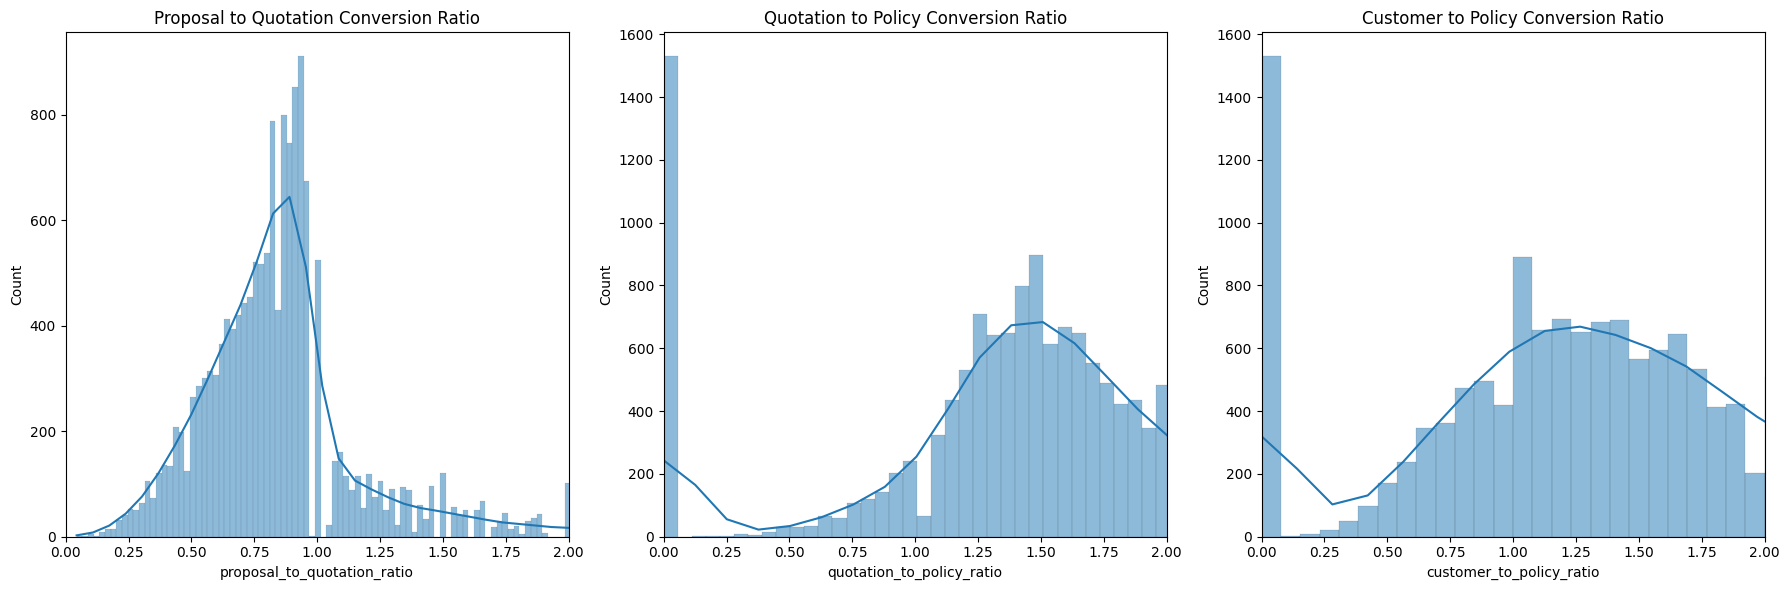

In [ ]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.histplot(train_df['proposal_to_quotation_ratio'].dropna(), kde=True)
plt.title('Proposal to Quotation Conversion Ratio')
plt.xlim(0, 2)

plt.subplot(1, 3, 2)
sns.histplot(train_df['quotation_to_policy_ratio'].dropna(), kde=True)
plt.title('Quotation to Policy Conversion Ratio')
plt.xlim(0, 2)

plt.subplot(1, 3, 3)
sns.histplot(train_df['customer_to_policy_ratio'].dropna(), kde=True)
plt.title('Customer to Policy Conversion Ratio')
plt.xlim(0, 2)

plt.tight_layout()
plt.show()

In [ ]:
# Get the last 5 months
last_five_months = agent_monthly_sales.columns[-2:]

# Find agents with 0 sales in the last 5 months
zero_sales_agents = agent_monthly_sales[agent_monthly_sales[last_five_months].sum(axis=1) == 0]

# Display the agents
zero_sales_agents


year_month,2023-01-01,2023-02-01,2023-03-01,2023-04-01,2023-05-01,2023-06-01,2023-07-01,2023-08-01,2023-09-01,2023-10-01,2023-11-01,2023-12-01,2024-01-01,2024-02-01,2024-03-01,2024-04-01,2024-05-01,2024-06-01,2024-07-01,2024-08-01
agent_code,,,,,,,,,,,,,,,,,,,,
39f484d0,24,33,19,21,14,30,29,0,0,18,10,12,15,26,16,15,0,14,0,0
3ce8e9ed,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,18,0,0
4a8112fe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,24,0,0
65e7321a,0,0,0,0,0,0,0,15,24,21,22,25,0,25,13,31,16,23,0,0
85f1427f,14,22,21,0,31,18,26,31,13,25,32,24,0,0,19,33,0,27,0,0
a0cc389a,0,17,0,23,20,16,24,16,32,25,19,22,23,25,30,14,24,16,0,0
bca73883,27,22,24,22,0,33,12,18,15,25,17,18,16,0,24,17,30,11,0,0


In [ ]:
# Count the number of zeros for each agent
zero_counts = (agent_monthly_sales == 0).sum(axis=1)

# Filter agents with more than two zero values
agents_with_more_than_two_zeros = agent_monthly_sales[zero_counts > 3]

# Display the result
agents_with_more_than_two_zeros


year_month,2023-01-01,2023-02-01,2023-03-01,2023-04-01,2023-05-01,2023-06-01,2023-07-01,2023-08-01,2023-09-01,2023-10-01,2023-11-01,2023-12-01,2024-01-01,2024-02-01,2024-03-01,2024-04-01,2024-05-01,2024-06-01,2024-07-01,2024-08-01
agent_code,,,,,,,,,,,,,,,,,,,,
00d5bda3,19,18,0,0,29,31,33,33,28,32,0,37,35,30,19,22,0,18,21,0
01b0edf6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,17,16,14
01c0860d,0,0,0,0,0,0,0,0,0,0,0,26,31,10,0,18,24,14,18,18
01cf7b40,0,0,0,23,31,24,14,24,22,0,19,25,30,29,35,20,30,27,25,16
0330163d,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,38,24,15,18,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fcbbbef0,0,0,0,0,0,0,0,0,0,0,0,0,0,28,23,21,24,27,22,26
fd85f614,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31,25,0
fe7e49da,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,20,22


In [ ]:
# prompt: check if there are later agent_join_month than first_policy_sold_month

# Check for rows where agent_join_month is later than first_policy_sold_month
later_join_date = train_df[train_df['agent_join_month'] > train_df['first_policy_sold_month']]

# Print the number of such rows
print(f"Number of rows where agent joined later than first policy sold: {len(later_join_date)}")

# Display those rows (optional)
print(later_join_date[['agent_code', 'agent_join_month', 'first_policy_sold_month']])


Number of rows where agent joined later than first policy sold: 115
      agent_code agent_join_month first_policy_sold_month
12703   e523a957       2024-05-01              2024-04-01
12766   e930f449       2024-05-01              2024-04-01
12775   c9e6afaa       2024-05-01              2024-04-01
12789   9bcb60ec       2024-05-01              2024-04-01
12800   862e2590       2024-05-01              2024-04-01
...          ...              ...                     ...
15254   c9e6afaa       2024-05-01              2024-04-01
15258   9bcb60ec       2024-05-01              2024-04-01
15291   b9360919       2024-06-01              2024-04-01
15295   deed0e45       2024-06-01              2024-04-01
15300   e63b3cba       2024-05-01              2024-04-01

[115 rows x 3 columns]


In [ ]:
# Calculate the difference between the two dates
train_df['date_diff'] = (train_df['agent_join_month'] - train_df['first_policy_sold_month']).dt.days

# Filter rows where the difference is greater than 29 days
later_join_date_2_months = train_df[train_df['date_diff'] > 29]

# Print the number of such rows
print(f"Number of rows with more than two months difference: {len(later_join_date_2_months)}")

# Display those rows (optional)
print(later_join_date_2_months[['agent_code', 'agent_join_month', 'first_policy_sold_month', 'date_diff']])

Number of rows with more than two months difference: 115
      agent_code agent_join_month first_policy_sold_month  date_diff
12703   e523a957       2024-05-01              2024-04-01         30
12766   e930f449       2024-05-01              2024-04-01         30
12775   c9e6afaa       2024-05-01              2024-04-01         30
12789   9bcb60ec       2024-05-01              2024-04-01         30
12800   862e2590       2024-05-01              2024-04-01         30
...          ...              ...                     ...        ...
15254   c9e6afaa       2024-05-01              2024-04-01         30
15258   9bcb60ec       2024-05-01              2024-04-01         30
15291   b9360919       2024-06-01              2024-04-01         61
15295   deed0e45       2024-06-01              2024-04-01         61
15300   e63b3cba       2024-05-01              2024-04-01         30

[115 rows x 4 columns]


In [ ]:
# Calculate time to first sale in months
train_df['months_to_first_sale'] = ((train_df['first_policy_sold_month'].dt.year - train_df['agent_join_month'].dt.year) * 12 +
                            (train_df['first_policy_sold_month'].dt.month - train_df['agent_join_month'].dt.month))

In [ ]:
train_df.loc[train_df['months_to_first_sale'] < 0, 'months_to_first_sale'] = 0

In [ ]:
train_df.head(10)

,row_id,agent_code,agent_age,agent_join_month,first_policy_sold_month,year_month,unique_proposals_last_7_days,unique_proposals_last_15_days,unique_proposals_last_21_days,unique_proposal,unique_quotations_last_7_days,unique_quotations_last_15_days,unique_quotations_last_21_days,unique_quotations,unique_customers_last_7_days,unique_customers_last_15_days,unique_customers_last_21_days,unique_customers,new_policy_count,ANBP_value,net_income,number_of_policy_holders,number_of_cash_payment_policies,date_diff,agent_tenure_months,months_to_first_sale
0,1,455ca878,45,2021-02-01,2023-09-01,2023-01-01,3,6,2,12,3,0,4,9,3,4,8,15,0,0,93313,30,162,-942,23,31
1,2,c823ce77,48,2022-04-01,2024-02-01,2023-01-01,1,4,12,21,3,1,8,14,4,3,10,17,25,1071450,164804,0,175,-671,9,22
2,3,62154055,53,2020-05-01,2023-09-01,2023-01-01,3,5,5,17,1,6,5,14,3,7,11,21,26,1601210,426690,84,78,-1218,32,40
3,4,c58bfa6e,44,2019-07-01,2022-03-01,2023-01-01,1,0,12,17,1,1,5,11,2,2,9,13,18,283230,47793,39,144,-974,42,32
4,5,b1e5f770,20,2020-09-01,2023-02-01,2023-01-01,0,6,10,17,3,6,2,13,3,10,6,19,20,1957680,562239,19,40,-883,28,29
5,6,b9c2f37a,32,2019-10-01,2022-08-01,2023-01-01,2,2,16,24,2,0,5,13,4,0,9,13,28,2238964,586313,52,168,-1035,39,34
6,7,b09dd216,41,2022-03-01,2023-01-01,2023-01-01,1,6,4,12,0,4,9,14,2,7,13,22,17,1470891,202714,0,119,-306,10,10
7,8,224be699,59,2020-07-01,2023-07-01,2023-01-01,3,0,3,8,4,2,9,16,4,2,11,17,16,342656,78341,51,64,-1095,30,36
8,9,003c1999,35,2020-08-01,2022-12-01,2023-01-01,2,2,0,8,0,0,0,2,2,2,1,5,0,0,327407,5,0,-852,29,28
9,10,d7f98932,41,2020-03-01,2023-05-01,2023-01-01,0,6,8,15,1,5,0,14,3,6,3,12,17,733499,121582,48,153,-1156,34,38


In [ ]:
# Create a flag for NILL agents (those with 0 new policies)
train_df['is_nill'] = (train_df['new_policy_count'] == 0).astype(int)
print(f"\nPercentage of NILL agents: {train_df['is_nill'].mean() * 100:.2f}%")


Percentage of NILL agents: 9.99%


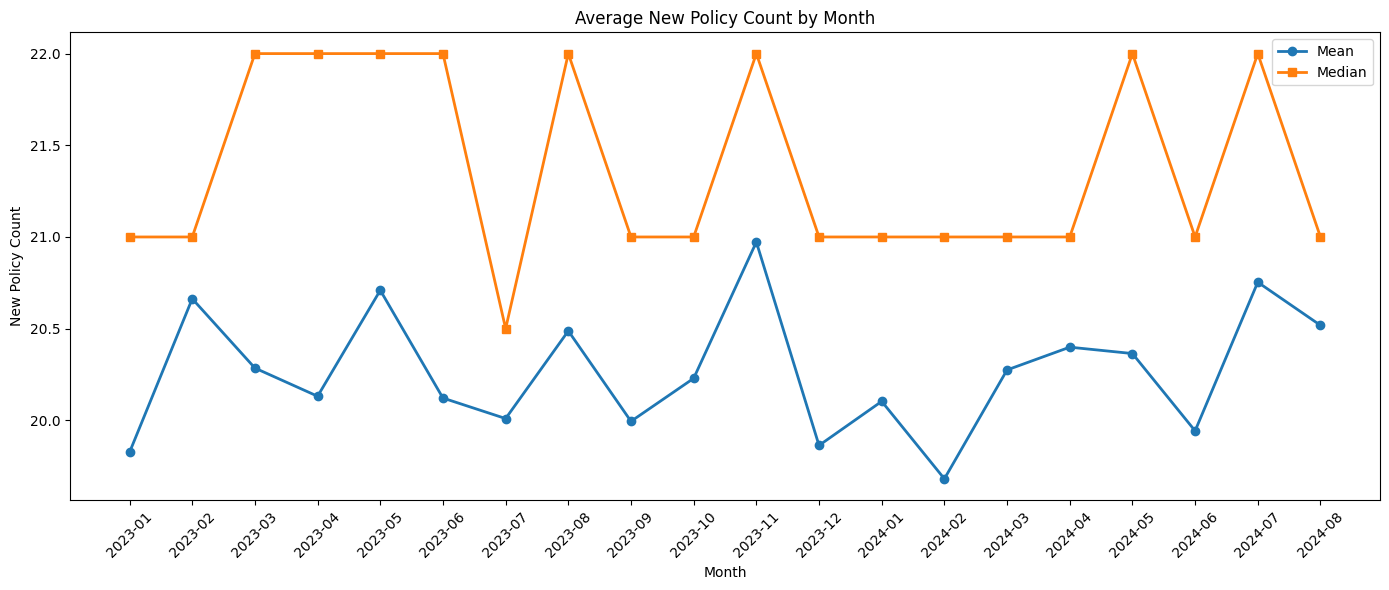

In [ ]:
monthly_sales = train_df.groupby('year_month')['new_policy_count'].agg(['mean', 'median', 'count']).reset_index()
monthly_sales['year_month'] = monthly_sales['year_month'].dt.strftime('%Y-%m')

plt.figure(figsize=(14, 6))
plt.plot(monthly_sales['year_month'], monthly_sales['mean'], marker='o', linewidth=2, label='Mean')
plt.plot(monthly_sales['year_month'], monthly_sales['median'], marker='s', linewidth=2, label='Median')
plt.title('Average New Policy Count by Month')
plt.xlabel('Month')
plt.ylabel('New Policy Count')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

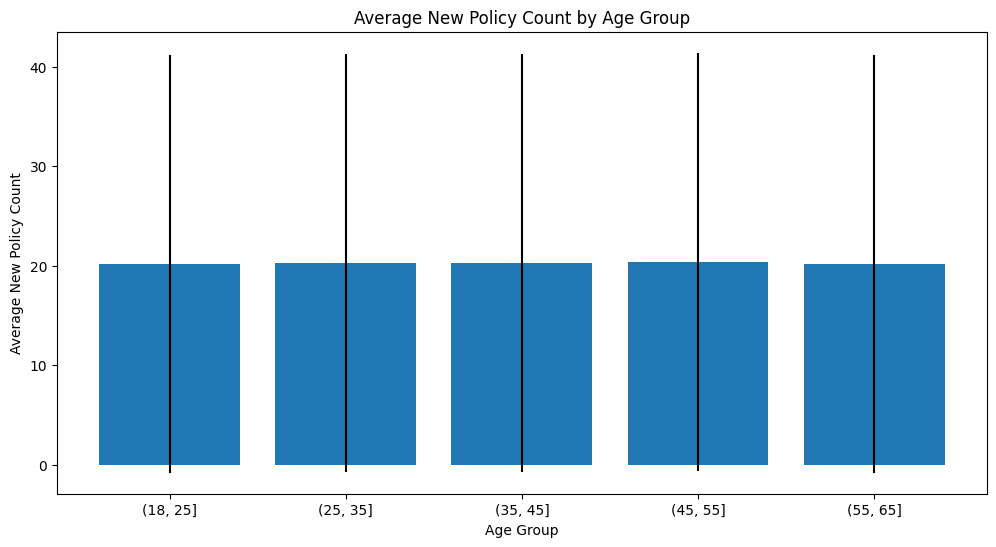

In [ ]:
# Analyze impact of agent age on performance
plt.figure(figsize=(12, 6))
age_groups = pd.cut(train_df['agent_age'], bins=[18, 25, 35, 45, 55, 65])
performance_by_age = train_df.groupby(age_groups)['new_policy_count'].agg(['mean', 'median', 'count']).reset_index()

plt.bar(performance_by_age['agent_age'].astype(str), performance_by_age['mean'], yerr=performance_by_age['median'])
plt.title('Average New Policy Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average New Policy Count')
plt.show()

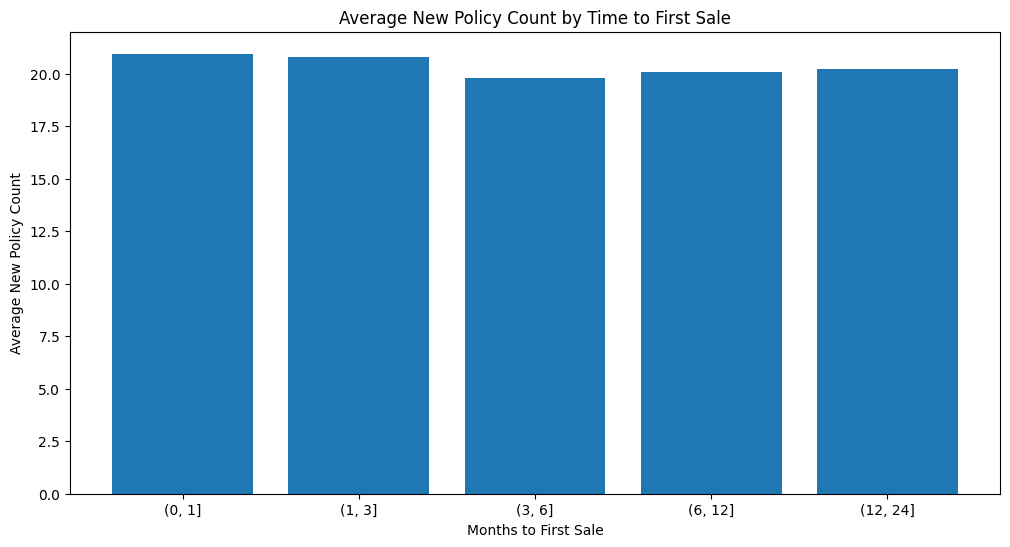

In [ ]:
# Analyze time-to-first-sale vs long-term performance
plt.figure(figsize=(12, 6))
sale_time_groups = pd.cut(train_df['months_to_first_sale'].dropna(), bins=[0, 1, 3, 6, 12, 24])
performance_by_first_sale = train_df.groupby(sale_time_groups)['new_policy_count'].agg(['mean', 'median', 'count']).reset_index()

plt.bar(performance_by_first_sale['months_to_first_sale'].astype(str), performance_by_first_sale['mean'])
plt.title('Average New Policy Count by Time to First Sale')
plt.xlabel('Months to First Sale')
plt.ylabel('Average New Policy Count')
plt.show()

In [ ]:
df_sorted = train_df.sort_values(['agent_code', 'year_month'])

agent_months = []
for agent, group in df_sorted.groupby('agent_code'):
    for i in range(len(group) - 1):  # Exclude the last month
        current_month_data = group.iloc[i].copy()
        next_month_data = group.iloc[i + 1]
        current_month_data['next_month_nill'] = 1 if next_month_data['new_policy_count'] == 0 else 0
        agent_months.append(current_month_data)

In [ ]:
pred_df = pd.DataFrame(agent_months)

In [ ]:
feature_cols = ['agent_age', 'agent_tenure_months', 'months_to_first_sale',
                'unique_proposals_last_7_days', 'unique_proposals_last_15_days',
                'unique_proposals_last_21_days', 'unique_proposal',
                'unique_quotations_last_7_days', 'unique_quotations_last_15_days',
                'unique_quotations_last_21_days', 'unique_quotations',
                'unique_customers_last_7_days', 'unique_customers_last_15_days',
                'unique_customers_last_21_days', 'unique_customers',
                'new_policy_count', 'ANBP_value', 'net_income',
                'number_of_policy_holders', 'number_of_cash_payment_policies',
                'proposal_to_quotation_ratio', 'quotation_to_policy_ratio', 'customer_to_policy_ratio']

In [ ]:
# Clean the data: drop rows with NaN values
pred_df_clean = pred_df.dropna(subset=feature_cols + ['next_month_nill'])

In [ ]:
pred_df_clean

,row_id,agent_code,agent_age,agent_join_month,first_policy_sold_month,year_month,unique_proposals_last_7_days,unique_proposals_last_15_days,unique_proposals_last_21_days,unique_proposal,unique_quotations_last_7_days,unique_quotations_last_15_days,unique_quotations_last_21_days,unique_quotations,unique_customers_last_7_days,unique_customers_last_15_days,unique_customers_last_21_days,unique_customers,new_policy_count,ANBP_value,net_income,number_of_policy_holders,number_of_cash_payment_policies,date_diff,agent_tenure_months,months_to_first_sale,is_nill,proposal_to_quotation_ratio,quotation_to_policy_ratio,customer_to_policy_ratio,next_month_nill
8,9,003c1999,35,2020-08-01,2022-12-01,2023-01-01,2,2,0,8,0,0,0,2,2,2,1,5,0,0,327407,5,0,-852,29,28,1,0.250000,0.000000,0.000000,0
958,959,003c1999,35,2020-08-01,2022-12-01,2023-02-01,3,2,20,30,0,2,6,14,2,5,12,19,31,2408297,408662,57,217,-852,30,28,0,0.466667,2.214286,1.631579,0
1761,1762,003c1999,35,2020-08-01,2022-12-01,2023-03-01,0,2,19,23,2,1,7,19,4,5,11,20,27,1901097,287226,20,243,-852,31,28,0,0.826087,1.421053,1.350000,0
2577,2578,003c1999,35,2020-08-01,2022-12-01,2023-04-01,2,6,11,21,3,5,7,19,4,9,7,20,22,1635788,381203,60,176,-852,32,28,0,0.904762,1.157895,1.100000,0
2708,2709,003c1999,35,2020-08-01,2022-12-01,2023-05-01,3,3,7,15,4,4,5,14,4,6,8,18,20,1876640,471548,0,180,-852,33,28,0,0.933333,1.428571,1.111111,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10661,10662,fffb525d,32,2020-03-01,2023-11-01,2024-03-01,3,2,7,15,3,6,3,13,5,9,4,18,20,1953260,429008,36,60,-1340,48,44,0,0.866667,1.538462,1.111111,0
10976,10977,fffb525d,32,2020-03-01,2023-11-01,2024-04-01,2,6,7,17,1,6,9,17,1,9,9,19,25,557100,100780,57,75,-1340,49,44,0,1.000000,1.470588,1.315789,0
12008,12009,fffb525d,32,2020-03-01,2023-11-01,2024-05-01,0,6,12,23,0,4,4,21,1,4,6,11,29,1367553,316643,0,29,-1340,50,44,0,0.913043,1.380952,2.636364,1
12950,12951,fffb525d,32,2020-03-01,2023-11-01,2024-06-01,2,6,5,14,1,6,1,12,3,9,6,18,0,0,118609,54,184,-1340,51,44,1,0.857143,0.000000,0.000000,0


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.cluster import KMeans

X = pred_df_clean[feature_cols]
y = pred_df_clean['next_month_nill']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("\nModel Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Model Performance:
Accuracy: 0.8952
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC AUC: 0.5123

Confusion Matrix:
[[2579    1]
 [ 301    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.94      2580
           1       0.00      0.00      0.00       301

    accuracy                           0.90      2881
   macro avg       0.45      0.50      0.47      2881
weighted avg       0.80      0.90      0.85      2881




Top 10 Important Features:
                            Feature  Importance
17                       net_income    0.070311
16                       ANBP_value    0.062670
19  number_of_cash_payment_policies    0.058512
20      proposal_to_quotation_ratio    0.057040
1               agent_tenure_months    0.055921
2              months_to_first_sale    0.055532
0                         agent_age    0.055081
22         customer_to_policy_ratio    0.054951
21        quotation_to_policy_ratio    0.052294
18         number_of_policy_holders    0.047092


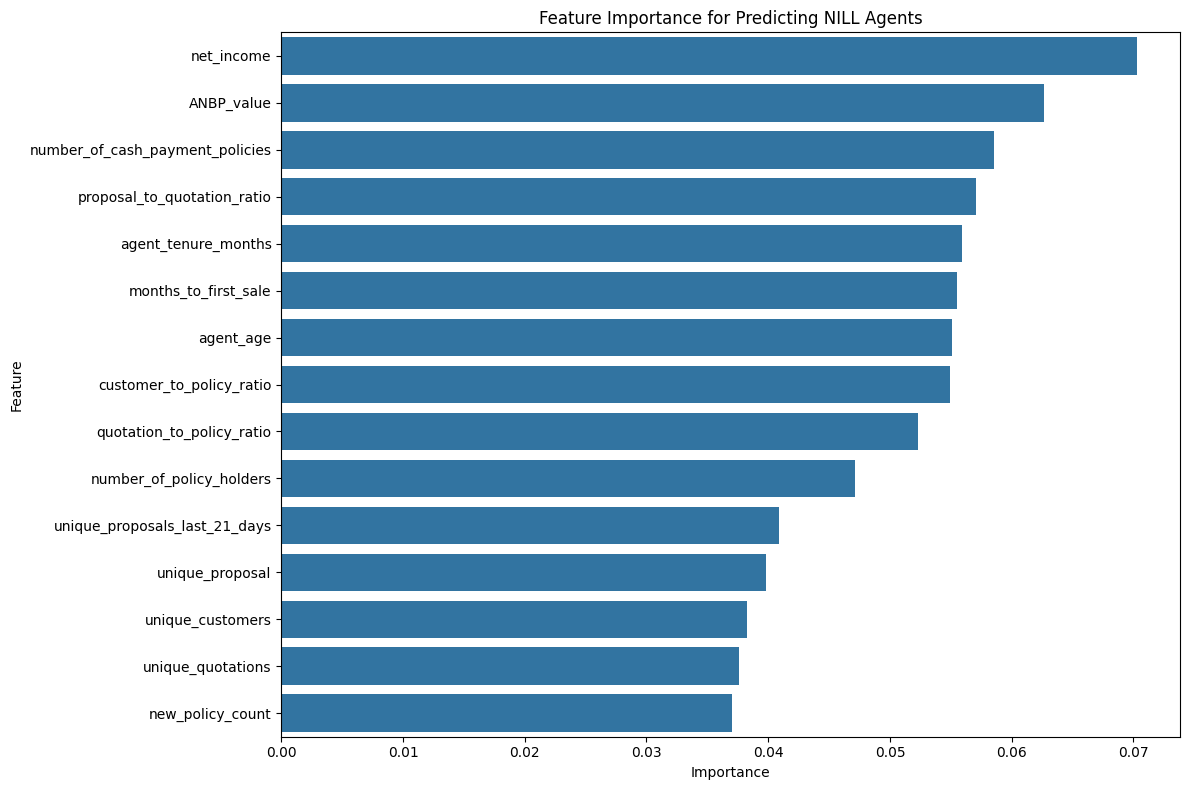

In [ ]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Important Features:")
print(feature_importance.head(10))

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Feature Importance for Predicting NILL Agents')
plt.tight_layout()
plt.show()



---------- AGENT CATEGORIZATION AND IMPROVEMENT ----------


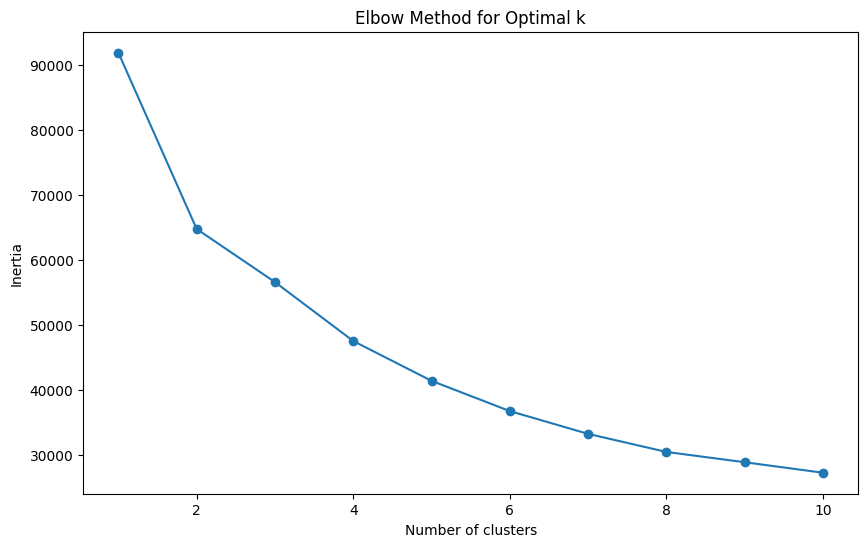

In [ ]:
print("\n\n---------- AGENT CATEGORIZATION AND IMPROVEMENT ----------")

# Select features for clustering
cluster_features = ['new_policy_count', 'ANBP_value', 'unique_customers',
                   'unique_proposal', 'proposal_to_quotation_ratio',
                   'quotation_to_policy_ratio']

# Prepare data for clustering
cluster_df = train_df[cluster_features].copy()
cluster_df = cluster_df.dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_df)

# Determine optimal number of clusters using elbow method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Apply KMeans clustering with the chosen number of clusters (let's use 3)
kmeans = KMeans(n_clusters=3, random_state=42)
df_temp = train_df.copy()
df_temp['cluster'] = kmeans.fit_predict(scaled_data)

# Get the cluster centers and interpret the clusters
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_),
                              columns=cluster_features)
print("\nCluster Centers:")
print(cluster_centers)


Cluster Centers:
   new_policy_count    ANBP_value  unique_customers  unique_proposal  \
0         10.748747  5.527107e+05         19.253133         8.057018   
1         14.403005  5.884374e+05         14.800902        14.451240   
2         27.956072  1.544239e+06         15.296868        22.546550   

   proposal_to_quotation_ratio  quotation_to_policy_ratio  
0                     1.892755                   0.797723  
1                     0.865570                   1.301712  
2                     0.697327                   2.017717  


In [ ]:
# Map clusters to performance categories
cluster_stats = df_temp.groupby('cluster')[cluster_features].mean().sort_values('new_policy_count')
cluster_stats['performance_category'] = ['Low', 'Medium', 'High']
print("\nCluster Statistics:")
print(cluster_stats)

# Map clusters to performance categories in the original dataframe
cluster_map = dict(zip(cluster_stats.index, cluster_stats['performance_category']))
df_temp['performance_category'] = df_temp['cluster'].map(cluster_map)


Cluster Statistics:
         new_policy_count    ANBP_value  unique_customers  unique_proposal  \
cluster                                                                      
0               10.783313  5.542328e+05         19.259651         8.077833   
1               14.395724  5.875444e+05         14.786478        14.455052   
2               27.952556  1.544242e+06         15.302365        22.542699   

         proposal_to_quotation_ratio  quotation_to_policy_ratio  \
cluster                                                           
0                           1.888910                   0.799882   
1                           0.864838                   1.301985   
2                           0.697530                   2.017278   

        performance_category  
cluster                       
0                        Low  
1                     Medium  
2                       High  


In [ ]:
# Analyze characteristics of each performance category
performance_analysis = df_temp.groupby('performance_category')[cluster_features +
                                                             ['agent_age', 'agent_tenure_months']].mean()
print("\nPerformance Category Analysis:")
print(performance_analysis)


Performance Category Analysis:
                      new_policy_count    ANBP_value  unique_customers  \
performance_category                                                     
High                         27.952556  1.544242e+06         15.302365   
Low                          10.783313  5.542328e+05         19.259651   
Medium                       14.395724  5.875444e+05         14.786478   

                      unique_proposal  proposal_to_quotation_ratio  \
performance_category                                                 
High                        22.542699                     0.697530   
Low                          8.077833                     1.888910   
Medium                      14.455052                     0.864838   

                      quotation_to_policy_ratio  agent_age  \
performance_category                                         
High                                   2.017278  40.628523   
Low                                    0.799882  41.128269  

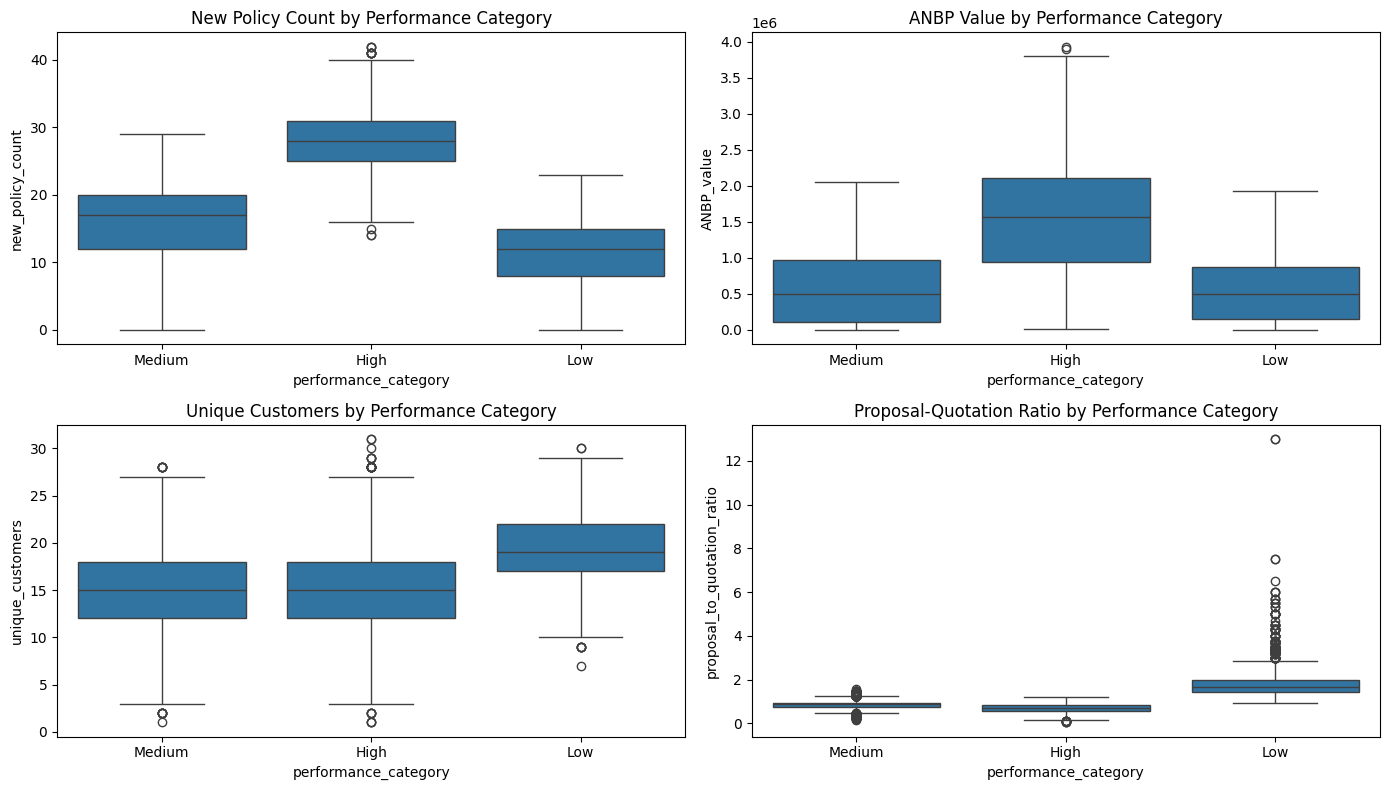

In [ ]:
# Visualize the performance categories
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 1)
sns.boxplot(x='performance_category', y='new_policy_count', data=df_temp)
plt.title('New Policy Count by Performance Category')

plt.subplot(2, 2, 2)
sns.boxplot(x='performance_category', y='ANBP_value', data=df_temp)
plt.title('ANBP Value by Performance Category')

plt.subplot(2, 2, 3)
sns.boxplot(x='performance_category', y='unique_customers', data=df_temp)
plt.title('Unique Customers by Performance Category')

plt.subplot(2, 2, 4)
sns.boxplot(x='performance_category', y='proposal_to_quotation_ratio', data=df_temp)
plt.title('Proposal-Quotation Ratio by Performance Category')

plt.tight_layout()
plt.show()